In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score,accuracy_score, confusion_matrix
from scipy import stats

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"C:\Users\Admin\Downloads\mcdonalds.csv")

In [4]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [5]:
data.columns.values.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [6]:
data.shape

(1453, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [9]:
MD = data.iloc[:, 0:11].replace("Yes", 1).replace("No", 0)

In [10]:
MD

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [11]:
z_scores = np.abs(stats.zscore(MD))
outliers = (z_scores > 3).any(axis=1)
print("Number of outliers detected:", outliers.sum())

Number of outliers detected: 355


In [12]:
MD_clean = MD[~outliers]
print("Data shape after outlier removal:", MD_clean.shape)
mean_values = round(MD_clean.mean(), 2)
print("Mean values:", mean_values)

Data shape after outlier removal: (1098, 11)
Mean values: yummy         0.60
convenient    1.00
spicy         0.00
fattening     0.88
greasy        0.49
fast          1.00
cheap         0.65
tasty         0.69
expensive     0.30
healthy       0.20
disgusting    0.19
dtype: float64


In [13]:
pca = PCA()
MD_pca = pca.fit_transform(MD_clean)
MD_p = pca.fit(MD_clean)

SD = np.sqrt(pca.explained_variance_)
PV = pca.explained_variance_ratio_
index = []
for i in range(len(SD)):
    index.append("PC{}".format(i + 1))

summary = pd.DataFrame({
    "Standard deviation": SD,
    "Proportion of Variance": PV,
    "Cumulative Proportion": PV.cumsum()
}, index=index)
print("PCA Summary:", summary)

PCA Summary:       Standard deviation  Proportion of Variance  Cumulative Proportion
PC1         6.902199e-01            3.049656e-01               0.304966
PC2         6.079060e-01            2.365640e-01               0.541530
PC3         5.065892e-01            1.642812e-01               0.705811
PC4         3.894312e-01            9.708168e-02               0.802893
PC5         3.222948e-01            6.649400e-02               0.869387
PC6         2.743484e-01            4.818156e-02               0.917568
PC7         2.679572e-01            4.596283e-02               0.963531
PC8         2.386846e-01            3.646909e-02               1.000000
PC9         8.143501e-09            4.245200e-17               1.000000
PC10        5.246449e-09            1.762004e-17               1.000000
PC11        4.171009e-09            1.113674e-17               1.000000


In [14]:
print("Standard Deviation:", SD.round(1))
load = (pca.components_)
rot_matrix = MD_p.components_.T
rot_df = pd.DataFrame(rot_matrix, index=MD_clean.columns.values, columns=index)
rot_df = round(-rot_df, 3)
print("PCA Loadings:", rot_df)

Standard Deviation: [0.7 0.6 0.5 0.4 0.3 0.3 0.3 0.2 0.  0.  0. ]
PCA Loadings:               PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy      -0.543  0.304 -0.335  0.010 -0.178 -0.215  0.649  0.050 -0.000   
convenient -0.000 -0.000 -0.000 -0.000 -0.000  0.000 -0.000 -0.000  0.229   
spicy       0.000  0.000 -0.000  0.000  0.000  0.000  0.000 -0.000 -0.964   
fattening   0.152  0.021 -0.270  0.399 -0.001 -0.767 -0.302  0.256 -0.000   
greasy      0.340  0.008 -0.797 -0.382  0.289  0.140  0.003 -0.023  0.000   
fast       -0.000 -0.000 -0.000  0.000 -0.000  0.000  0.000 -0.000 -0.138   
cheap      -0.246 -0.664 -0.167 -0.020 -0.125 -0.217 -0.037 -0.637 -0.000   
tasty      -0.518  0.234 -0.288  0.064 -0.246  0.303 -0.661  0.013  0.000   
expensive   0.228  0.636  0.099 -0.072 -0.063 -0.205 -0.087 -0.689  0.000   
healthy    -0.263  0.013  0.238 -0.786  0.137 -0.407 -0.202  0.175 -0.000   
disgusting  0.341 -0.073 -0.059 -0.258 -0.886 -0.012  0.035  0.144 -0.000

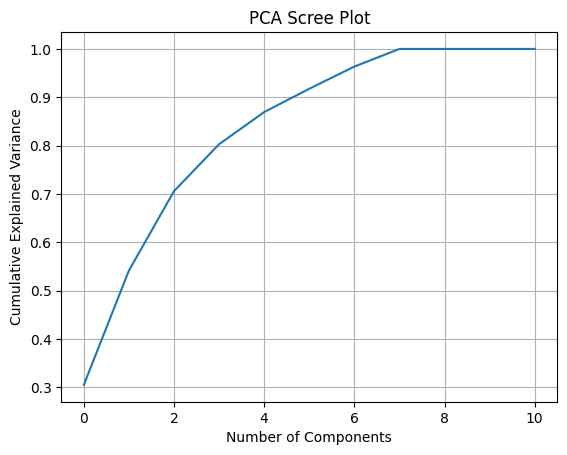

In [15]:
plt.plot(np.cumsum(PV))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot")
plt.grid()
plt.show()


In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(MD_pca)
data_clean = data[~outliers]
data_clean['Cluster'] = clusters
print("Cluster counts:", data_clean['Cluster'].value_counts())

Cluster counts: Cluster
2    441
1    338
0    319
Name: count, dtype: int64


In [17]:
numeric_columns = data_clean.select_dtypes(include=np.number).columns
segment_summary = data_clean.groupby('Cluster')[numeric_columns].mean()

print("Segment summary:\n", segment_summary)

Segment summary:
                Age  Cluster
Cluster                    
0        46.896552      0.0
1        47.588757      1.0
2        38.201814      2.0


In [18]:
bootstrap_samples = 100
ari_scores = []
for _ in range(bootstrap_samples):
    sample = resample(MD_clean, random_state=42)
    sample_pca = pca.transform(sample)
    sample_clusters = kmeans.predict(sample_pca)
    ari = adjusted_rand_score(clusters, sample_clusters)
    ari_scores.append(ari)

print("Segment stability (ARI scores):", np.mean(ari_scores))

Segment stability (ARI scores): 0.001462665956145267


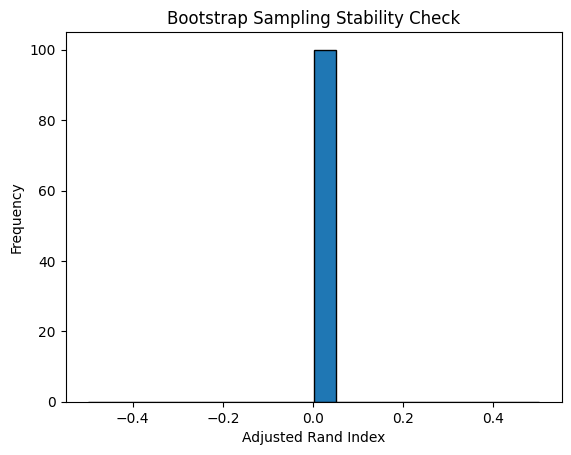

In [19]:
plt.hist(ari_scores, bins=20, edgecolor='black')
plt.xlabel('Adjusted Rand Index')
plt.ylabel('Frequency')
plt.title('Bootstrap Sampling Stability Check')
plt.show()

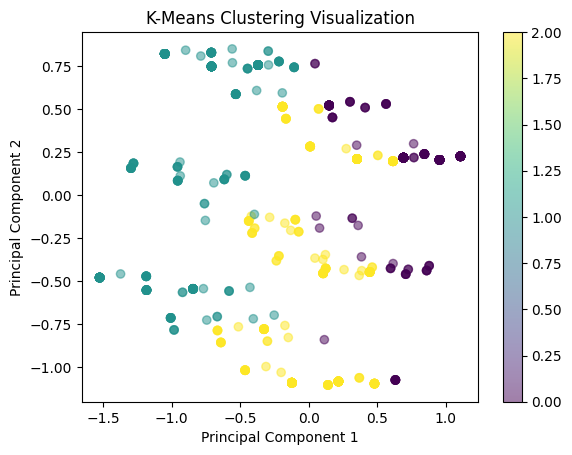

In [21]:
X = MD_pca 
y = clusters

In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)

LogisticRegression(max_iter=1000)

In [23]:
y_pred = log_reg.predict(X)


In [24]:
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
print("Logistic Regression Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Logistic Regression Accuracy: 0.9990892531876139
Confusion Matrix:
 [[319   0   0]
 [  0 338   0]
 [  1   0 440]]


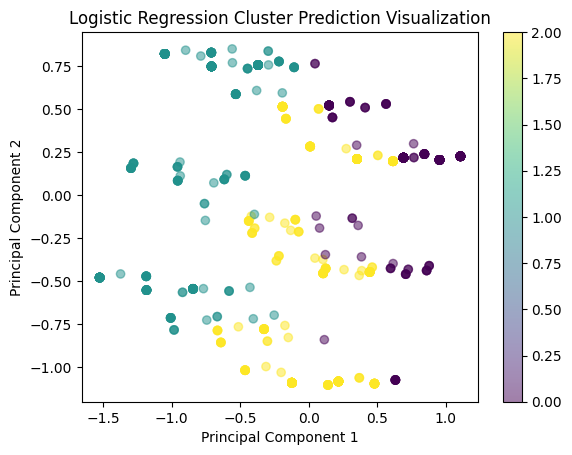

In [25]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=y_pred, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Cluster Prediction Visualization')
plt.colorbar()
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [27]:
y_pred_rf = rf_model.predict(X)

In [28]:
y_pred_rf = rf_model.predict(X)

In [29]:
accuracy_rf = accuracy_score(y, y_pred_rf)
conf_matrix_rf = confusion_matrix(y, y_pred_rf)

In [30]:
print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix for Random Forest:\n", conf_matrix_rf)

Random Forest Accuracy: 1.0
Confusion Matrix for Random Forest:
 [[319   0   0]
 [  0 338   0]
 [  0   0 441]]


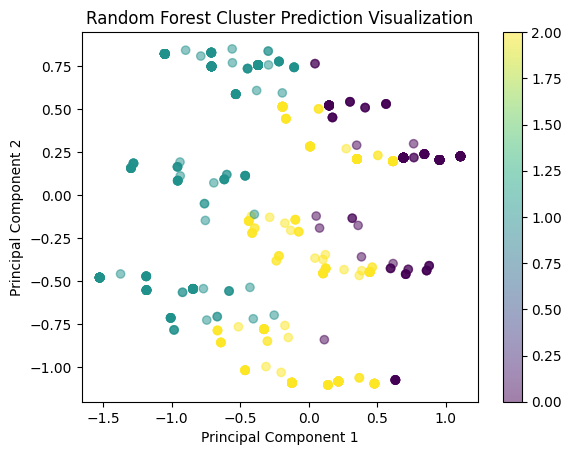

In [31]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=y_pred_rf, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Random Forest Cluster Prediction Visualization')
plt.colorbar()
plt.show()